<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

<center><h1>Universidad Internacional de La Rioja</header1></center>
<center><h1>Escuela Superior de Ingeniería y Tecnología</header1></center>
<center><h1>Máster Universitario en Análisis y Visualización de Datos Masivos</header1></center>                                            
<center><h2>Detección de anomalías para identificar patrones de fraude en el arrendamiento de vehículos</header2></center> 


Trabajo Fin de Máster <br>
Tipo de trabajo: Desarrollo de Software <br>
Presentado por: Franco Bermúdez, Laura Vanessa  <br>
Director: Macias Trejo, Luis Guadalupe

## Importación de librerias necesarias

In [1]:
#Para este software se utilizaron las siguientes librerías:

#Procesamiento de datos
import pandas as pd
import numpy as np
import category_encoders as ce

#Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#Para preprocesamiento y modelado
from sklearn.ensemble import IsolationForest
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

#Configuración de warnings
import warnings
warnings.filterwarnings('ignore')

## Carga del Dataset y Análisis Exploratorio EDA

In [2]:
filename = 'Flota.csv'
df = pd.read_csv(filename, header=0, low_memory=False, delimiter=";")

print(df.shape) #forma del conjunto de datos
print("__________________")
print(df.info()) #indica que tipo de variables conforman el conjunto de datos
print("__________________")
print(df.head()) #muestra las primeras líneas del conjunto de datos

(8475, 12)
__________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8475 entries, 0 to 8474
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ID Contrato               8475 non-null   int64 
 1   Tipo                      8475 non-null   object
 2   Gama                      8475 non-null   object
 3   Marca                     8475 non-null   object
 4   Modelo                    8475 non-null   int64 
 5   Estado Contrato           8475 non-null   object
 6   Meses Cotizados           8475 non-null   int64 
 7   Costo Histórico Vehículo  8475 non-null   int64 
 8   Segmento                  8475 non-null   object
 9   Ciudad                    8475 non-null   object
 10  PerfilRiesgo              8475 non-null   int64 
 11  Fraude                    8475 non-null   object
dtypes: int64(5), object(7)
memory usage: 794.7+ KB
None
__________________
   ID Contrato       Tipo      

#### Se verifican posibles datos null, en este caso todos los datos están completos.

No se encuentran datos null. En este caso no será necesario realizar imputación de valores ausentes.

In [3]:
df.isnull().sum().sum()

0

#### Se genera una descripción inicial de las variables 

Con la función describe, incluyendo las variables tipo object, se genera la descripción general de las variables.
+ count: indica cuantos registros hay para cada variable
+ unique: cantidad de tipos de registro de cada variable
+ top: registro que más se repite o moda
+ freq: frecuencia con la que se repite el registro top

In [4]:
df.select_dtypes(include=['object']).describe()

,Tipo,Gama,Marca,Estado Contrato,Segmento,Ciudad,Fraude
count,8475,8475,8475,8475,8475,8475,8475
unique,5,3,25,4,4,154,2
top,Automovil,Media,Chevrolet,Activo,Persona Natural,MEDELLÍN,No
freq,4180,3879,1649,5602,4744,2220,7865


Con la función describe se genera la descripción general de las variables númericas.
+ count: indica cuantos registros hay para cada variable
+ mean: media de la variable
+ std: desviación estandar
+ min y max: valores mínimos y máximos de la variable
+ Varios percentiles

In [5]:
df.describe()

,ID Contrato,Modelo,Meses Cotizados,Costo Histórico Vehículo,PerfilRiesgo
count,8475.000000,8475.000000,8475.000000,8.475000e+03,8475.000000
mean,111856.484956,2020.193746,37.694395,8.618726e+07,1.918230
std,31093.627387,3.442879,9.015187,5.385181e+07,0.803604
min,324.000000,2000.000000,0.000000,1.844742e+07,1.000000
25%,98281.000000,2020.000000,36.000000,4.600000e+07,1.000000
50%,118058.000000,2021.000000,36.000000,7.049060e+07,2.000000
75%,133572.000000,2022.000000,36.000000,1.091143e+08,3.000000
max,152078.000000,2023.000000,84.000000,5.699000e+08,4.000000


#### Se generan gráficas para las variables

En los siguientes gráficos se puede ver cómo están distribuidas las variables del dataset.

In [6]:
df2 = df.drop(["Marca", "Costo Histórico Vehículo", "Ciudad" ], axis=1)


Text(0.5, 0.98, 'Gráficas: Variables Categóricas')

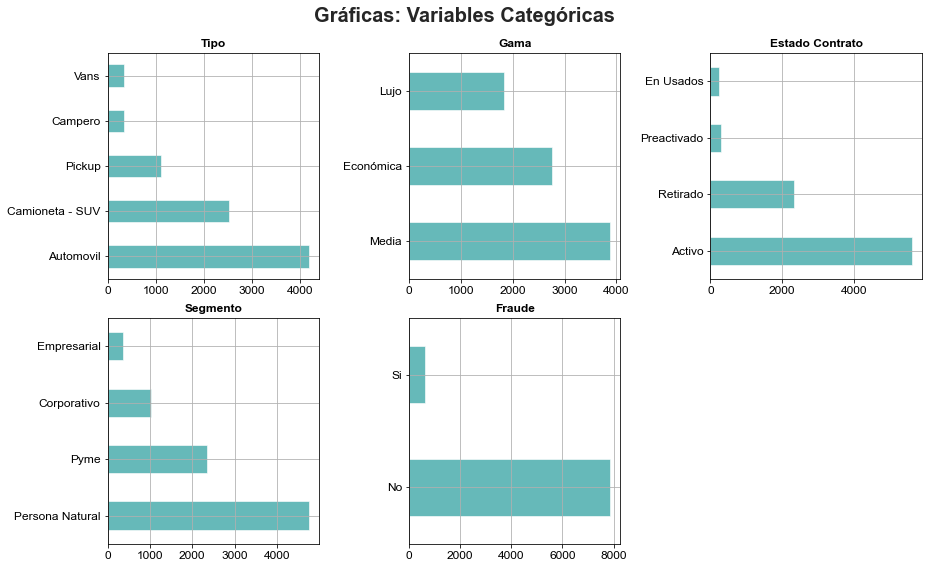

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(13, 8))
axes = axes.flat
columnas_object = df2.select_dtypes(include=["object"]).columns
sns.set_style("darkgrid")

for i, colum in enumerate(columnas_object):
    df2[colum].value_counts().plot.barh(ax=axes[i], alpha=0.6, color="DarkCyan")
    axes[i].set_title(colum, fontsize=12, fontweight="bold")
    axes[i].tick_params(labelsize=12)
    axes[i].set_xlabel("")

for i in [5]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle("Gráficas: Variables Categóricas",fontsize = 20, fontweight = "bold")

Text(0.5, 0.98, 'Gráfica: Distribución Marcas')

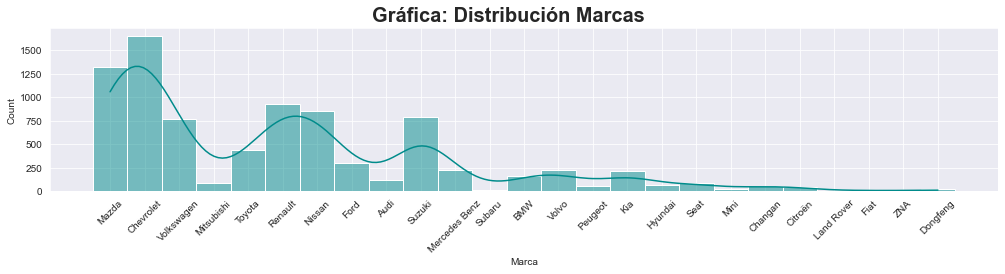

In [8]:
fig, ax = plt.subplots(figsize = (17, 3))
sns.set_style("darkgrid")
sns.histplot(df, x="Marca", color="DarkCyan", kde=True, ax= ax)
plt.xticks(rotation=45)
fig.suptitle("Gráfica: Distribución Marcas",fontsize = 20, fontweight = "bold")

Text(0.5, 0.98, 'Gráfica: Distribución Costo Histórico Vehículo')

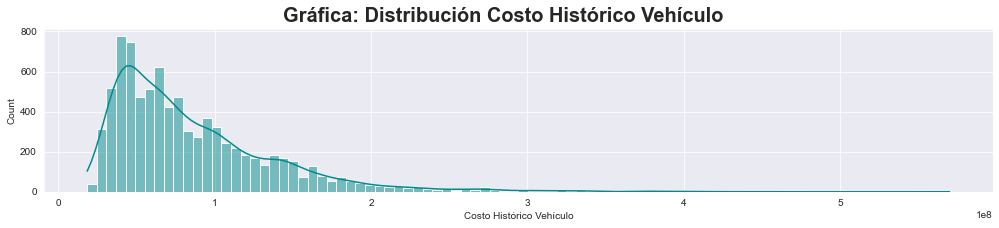

In [9]:
fig, ax = plt.subplots(figsize = (17, 3))
sns.set_style("darkgrid")
sns.histplot(df, x="Costo Histórico Vehículo", color="DarkCyan", kde=True, ax= ax)
fig.suptitle("Gráfica: Distribución Costo Histórico Vehículo",fontsize = 20, fontweight = "bold")

Text(0.5, 0.98, 'Gráficas: Relación Variables Númericas')

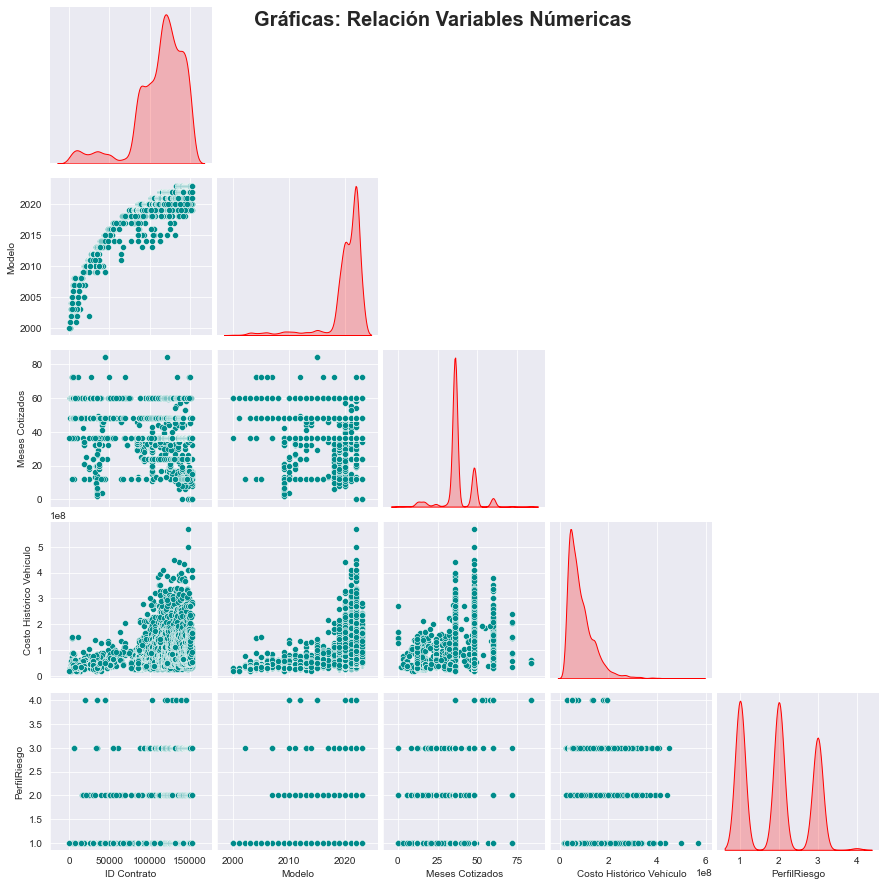

In [10]:
a = sns.pairplot(df, diag_kind="kde", corner=True,  diag_kws={'color':'red'}, plot_kws={'color':'DarkCyan'})
a.fig.suptitle("Gráficas: Relación Variables Númericas",fontsize = 20, fontweight = "bold")

## Procesamiento del dataset: Transformaciones necesarias para la modelación

En esta etapa se deben realizan las actividades para poder aplicar el modelo Isolation Forest:

1. Si bien se utiliza un conjunto de datos donde se conoce la etiqueta si han presentado fraude o no, el método a utilizar (Isolation Forest) es NO SUPERVISADO, estas etiquetas se utilizan para evaluar la capacidad del modelo para identificar correctamente las anomalías. Por ello se separa la columna Fraude en la variable Y y las demás variables en la X. 
2. Transformar variables categóricas a numéricas para el uso correcto del modelo.

In [11]:
datos_X = df.drop(["Fraude"], axis=1)
datos_y = df["Fraude"]

In [12]:
encoder = ce.OrdinalEncoder(cols=["Tipo", "Gama", "Estado Contrato", "Segmento","Marca", "Ciudad" ])

datos_X = encoder.fit_transform(datos_X)
datos_X.head()

,ID Contrato,Tipo,Gama,Marca,Modelo,Estado Contrato,Meses Cotizados,Costo Histórico Vehículo,Segmento,Ciudad,PerfilRiesgo
0,2843,1,1,1,2004,1,60,52600000,1,1,1
1,9922,2,2,2,2004,1,36,28607644,1,2,1
2,5610,1,1,3,2002,1,12,37000000,1,2,3
3,9923,2,2,2,2004,1,36,28607644,1,2,1
4,9924,2,2,2,2004,1,36,28607644,1,2,1


# 1.  Modelación Isolation Forest

## Modelación: definición de los hiperparámetros

+ n_estimators: corresponde al número de árboles (Isolation Trees IT) que conforman el modelo IF.

+ max_samples: es el número de instancias utilizadas en el entrenamiento de cada IT.

+ contamination: proporción de anomalías esperadas en los datos de entrenamiento. Se utiliza para establecer el límite con el cual clasifican las instancias como normales o anomalías.

+ random_state: semilla que garantiza la capacidad de reproducir de los resultados.

El dataset está compuesto por 8475 instancias, de las cuales se sabe que 610 son fraudes y el resto presentan condiciones normales. El porcentaje de anomalías es de 7,198%. Este valor será el utilizado para el hiperparámetro de contamination.

In [13]:
# Definición y entrenamiento del modelo

modelo_if = IsolationForest(
                n_estimators  = 1000,
                max_samples   ='auto',
                contamination = 0.07198,
                n_jobs        = -1,
                random_state  = 713,
            )

modelo_if.fit(X=datos_X)

IsolationForest(contamination=0.07198, n_estimators=1000, n_jobs=-1,
                random_state=713)

## Predicción
El método predict() devuelve un array con la clasificación de anomalía (-1) o normalidad (1) de acuerdo con la proporción de contaminación indicada en los hiperparámetros del modelo.

In [14]:
prediccion_anomalia = modelo_if.predict(X=datos_X)
prediccion_anomalia

array([-1,  1, -1, ...,  1,  1, -1])

El método score_samples(), no clasifica como lo hace predict(). Este método obtiene el valor de anomalía predicho por el modelo.
Los valores resultantes se normalizan y se multiplican por -1, quedando dentro del rango [-1, 0]. 
Si el valor es más cercano a -1 indica una mayor probabilidad de anomalía. Valores más cercanos a 0 son los esperados para instancias normales.

In [15]:
score_anomalia = modelo_if.score_samples(X=datos_X)
score_anomalia

array([-0.60432957, -0.55528818, -0.62917304, ..., -0.54272196,
       -0.54272196, -0.56765409])

En los hiperparámetros del modelo se indicó que la contamination o proporción de anomalías es del 7.198%. Con este valor se calcula la calificación o score de anomalía. Con esto el 7.198% de las observaciones se considerarán anomalías, es decir, el cuantil 0.07198.

In [16]:
cuantil7 = np.quantile(score_anomalia, q=0.07198)
cuantil7

-0.5558022786575529

Cuando se utiliza el cuantil para clasificar las observaciones como normales o anomlías, los resultados son equivalentes a los la predicción realizada por el método predict().

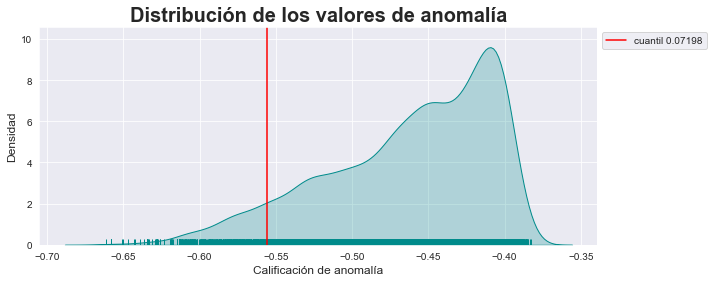

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
sns.distplot(score_anomalia, hist=False, rug=True, color='Darkcyan', kde_kws = {'shade': True, 'linewidth': 1},ax=ax)

ax.axvline(cuantil7, c='red', linestyle='-', label='cuantil 0.07198')
plt.legend(bbox_to_anchor=(1, 1), loc=2) 
ax.set_title('Distribución de los valores de anomalía',fontsize = 20, fontweight = "bold")
ax.set_xlabel('Calificación de anomalía', fontsize = 12);
ax.set_ylabel('Densidad', fontsize = 12);

## Detección de Anomalías y Verificación

A partir de la normalización realizada, y como se indicó anteriormente, los valores de calificación más cercanos a -1, es decir, los más negativos, son los que presentan mayor evidencia de anomalía. 

En este caso, como se tienen las etiquetas de fraude real que se han presentado, se verifica si efectivamente las instancias calificadas con valores cercanos a -1 efectivamente son las anomalías presentadas en el caso real. 

+ No corresponde a instancias Normales
+ Si corresponde a instancias con fraude o Anomalías

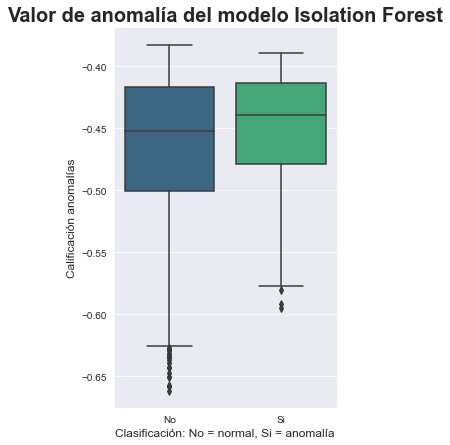

In [18]:
df_resultados = pd.DataFrame({'calificacion': score_anomalia, 'real': datos_y})

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 7))
sns.boxplot(x = 'real', y = 'calificacion', data = df_resultados, palette = 'viridis', ax = ax)

ax.set_title('Valor de anomalía del modelo Isolation Forest', fontsize = 20, fontweight = "bold")
ax.set_ylabel('Calificación anomalías', fontsize = 12)
ax.set_xlabel('Clasificación: No = normal, Si = anomalía', fontsize = 12);

In [19]:
df_resultados = df_resultados.sort_values('calificacion', ascending=True).reset_index(drop=True)

df_resultados['clasificacion'] = np.where(df_resultados.index <= 610, "Si", "No")

pd.crosstab(df_resultados.real,df_resultados.clasificacion)

clasificacion,No,Si
real,,
No,7272,593
Si,592,18


De las 610 instancias que realmente están categorizadas como anomalías, apenas el 2.95% (18/610) fueron clasificadas de manera correcta. Adicional a esto el porcentaje de falsos positivos (97.05%) es muy elevado. Por lo que se que concluye que el método de Isolation Forest no consigue resultados confiables para este caso en partícular.

# 2. Modelación Gaussian Mixture Model (GMM)

## Modelación: definición de los hiperparámetros

+ n_components: número de componentes del modelo.

+ covariance_type: tipo de matriz de covarianza, por defecto full.

+ max_iter: número máximo de iteraciones permitidas.

+ random_state:  semilla que garantiza la capacidad de reproducir de los resultados.


In [20]:
modelo_gmm = GaussianMixture(
                n_components    = 11,
                covariance_type = 'full',
                max_iter = 1000,
                random_state    = 713
             )

modelo_gmm.fit(X=datos_X)

GaussianMixture(max_iter=1000, n_components=11, random_state=713)

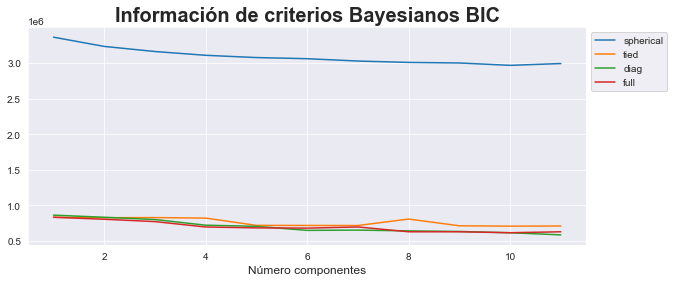

In [21]:
fig, ax = plt.subplots(figsize=(10, 4))

n_components = range(1, 12)
covariance_types = ['spherical', 'tied', 'diag', 'full']

for covariance_type in covariance_types:
    valores_bic = []
    
    for i in n_components:
        modelo_gmm = GaussianMixture(n_components=i, covariance_type=covariance_type)
        modelo_gmm = modelo_gmm.fit(X=datos_X)
        valores_bic.append(modelo_gmm.bic(datos_X))
        
    ax.plot(n_components, valores_bic, label=covariance_type, )
        
ax.set_title("Información de criterios Bayesianos BIC", fontsize = 20, fontweight = "bold")
ax.set_xlabel("Número componentes", fontsize = 12)
ax.legend(bbox_to_anchor=(1, 1),loc=2);

In [22]:
modelo_gmm = GaussianMixture(
                n_components    = 11,
                covariance_type = 'diag',
                max_iter = 1000,
                random_state    = 713
                )

modelo_gmm.fit(X=datos_X)

GaussianMixture(covariance_type='diag', max_iter=1000, n_components=11,
                random_state=713)

## Predicción

El método score_samples() para los modelos Gaussian Mixture Model entrega un array con los logaritmos de la densidad de la probabilidad. 

In [23]:
log_prob_pred = modelo_gmm.score_samples(X=datos_X)
log_prob_pred

array([-40.22820432, -37.50310364, -47.24297348, ..., -57.79145546,
       -57.79123363, -53.43868523])

Se gráfica la distribución de la densidad de las probabilidades de los logaritmos

Text(0.5, 0, 'Logaritmo de la densidad de probabilidad')

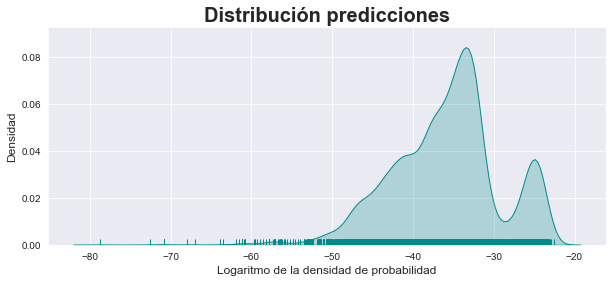

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
sns.distplot(log_prob_pred, hist=False, rug=True, color='darkcyan', kde_kws = {'shade': True, 'linewidth': 1}, ax=ax)

ax.set_title('Distribución predicciones', fontsize = 20, fontweight = "bold")
ax.set_ylabel('Densidad', fontsize = 12)
ax.set_xlabel('Logaritmo de la densidad de probabilidad', fontsize = 12)

## Detección de Anomalías y Verificación

+ No corresponde a instancias Normales
+ Si corresponde a instancias con fraude o Anomalías

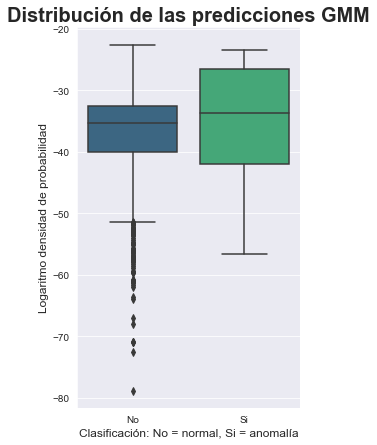

In [25]:
df_resultados = pd.DataFrame({'Dist probabilidad log': log_prob_pred, 'real': datos_y})

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 7))
sns.boxplot(x = 'real', y = 'Dist probabilidad log', data = df_resultados, palette = 'viridis', ax = ax)

ax.set_title('Distribución de las predicciones GMM', fontsize = 20, fontweight = "bold")
ax.set_ylabel('Logaritmo densidad de probabilidad', fontsize = 12)
ax.set_xlabel('Clasificación: No = normal, Si = anomalía', fontsize = 12);

In [26]:
df_resultados = df_resultados.sort_values('Dist probabilidad log', ascending=True).reset_index(drop=True)

df_resultados['clasificacion'] = np.where(df_resultados.index <= 610, "Si", "No")

pd.crosstab(df_resultados.real,df_resultados.clasificacion)

clasificacion,No,Si
real,,
No,7309,556
Si,555,55


De las 610 instancias que realmente están categorizadas como anomalías, apenas el 9.02% (55/610) fueron clasificadas de manera correcta. Adicional a esto el porcentaje de falsos positivos (90.98%) es muy elevado. Por lo que se que concluye que el método de GMM no consigue resultados confiables para este caso en partícular.

# 3. Modelación PCA - Principal Component Analysis

Este modelo permite reducir la dimensión en un dataset para su análisis, conservando la información original.

## Modelación: definición de los hiperparámetros

Primero se realiza un escalado de los datos:

+ scale: se utiliza un escalado de datos estándar

Luego se definen los hiperparámetros del PCA

+ n_components: componentes cálculados, none para utilizar inicialmente todas las variables del modelo.
+ random_state: semilla que garantiza la capacidad de reproducir de los resultados.


Se realiza el fit de los datos al modelo


In [27]:
pca_pipeline = make_pipeline(StandardScaler(), 
                             PCA(
                                 n_components=None,
                                random_state    = 713
                             ))

pca_pipeline.fit(X=datos_X)

modelo_pca = pca_pipeline.named_steps['pca']

Se calcula el porcentaje de varianza para cada variable y posteriormente se acumula para evaluar cuantas variables se requieren para explicar al menos el 90% del modelo y así determinar a cuantos componentes o variables se reduce

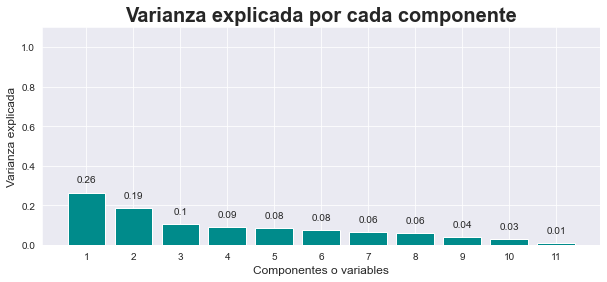

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
ax.bar(x = np.arange(modelo_pca.n_components_) + 1, height = modelo_pca.explained_variance_ratio_, color='darkcyan')

for x, y in zip(np.arange(modelo_pca.n_components_) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(label, (x,y), textcoords="offset points", xytext=(0,10), ha='center')

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Varianza explicada por cada componente', fontsize = 20, fontweight = "bold")
ax.set_xlabel('Componentes o variables', fontsize = 12)
ax.set_ylabel('Varianza explicada', fontsize = 12);

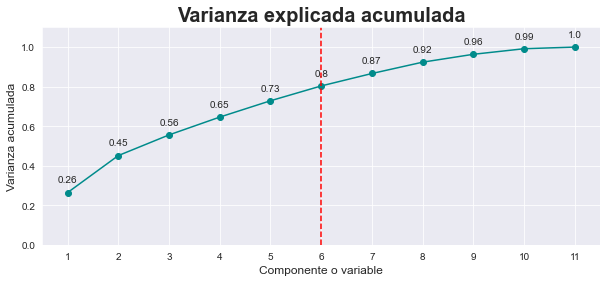

In [29]:
por_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
ax.plot(np.arange(modelo_pca.n_components_) + 1, por_varianza_acum, marker = 'o', color='darkcyan')

for x, y in zip(np.arange(modelo_pca.n_components_) + 1, por_varianza_acum):
    label = round(y, 2)
    ax.annotate(label, (x,y), textcoords="offset points", xytext=(0,10), ha='center')

ax.axvline(x=6, linestyle = '--', c='red')
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Varianza explicada acumulada', fontsize = 20, fontweight = "bold")
ax.set_xlabel('Componente o variable', fontsize = 12)
ax.set_ylabel('Varianza acumulada', fontsize = 12);

En este caso se alcanza el 80% de explicación de la varianza del modelo con 6 variables, por lo que se ajusta el modelo a 8 componentes para realizar la predicción

## Predicción

Partiendo de la matriz PCA se reconstruyen los datos iniciales y posteriormente se invierten. Con esto se calcula el error de la reconstrucción para realizar la predicción. 

In [30]:
proyecciones = pca_pipeline.transform(datos_X)
reconstruccion = pca_pipeline.inverse_transform(proyecciones)
reconstruccion = pd.DataFrame(reconstruccion, columns = datos_X.columns, index = datos_X.index)

In [31]:
def reconstruccion_pca(X, n_components, X_new=None):
    
    if X_new is None:
        X_new = X
    
    # Entrenamiento modelo PCA con escalado de los datos
    pca_pipeline = make_pipeline(StandardScaler(), PCA(n_components=n_components, random_state    = 713))
    pca_pipeline.fit(X=X)
    
    # Proyectar los datos
    proyecciones = pca_pipeline.transform(X_new)
    
    # Reconstrucción
    reconstruccion = pca_pipeline.inverse_transform(proyecciones)
    reconstruccion = pd.DataFrame(
                        reconstruccion,
                        columns = X_new.columns,
                        index   = X_new.index
                    )
    
    # Error cuadrático medio de reconstrucción
    error_reconstruccion = reconstruccion - X_new
    error_reconstruccion = error_reconstruccion**2
    error_reconstruccion = error_reconstruccion.mean(axis=1)
    
    print(f"Reconstrucción con un PCA de {n_components} componentes")
    
    return reconstruccion, error_reconstruccion

In [32]:
reconstruccion, error_reconstruccion = reconstruccion_pca(X=datos_X, n_components=6)

Reconstrucción con un PCA de 6 componentes


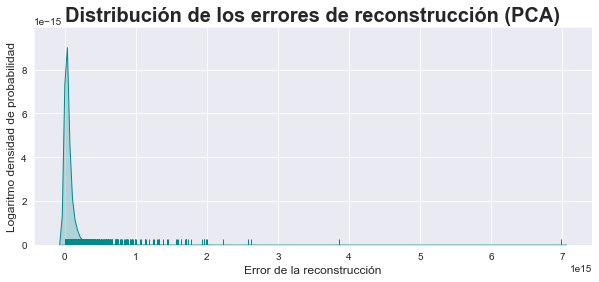

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
sns.kdeplot(error_reconstruccion, fill= True, ax= ax, color='darkcyan')

sns.rugplot(error_reconstruccion,  ax=ax, color='darkcyan')
ax.set_title('Distribución de los errores de reconstrucción (PCA)',fontsize = 20, fontweight = "bold")
ax.set_ylabel('Logaritmo densidad de probabilidad', fontsize = 12)
ax.set_xlabel('Error de la reconstrucción', fontsize = 12);

## Detección de Anomalías y Verificación

+ No corresponde a instancias Normales
+ Si corresponde a instancias con fraude o Anomalías

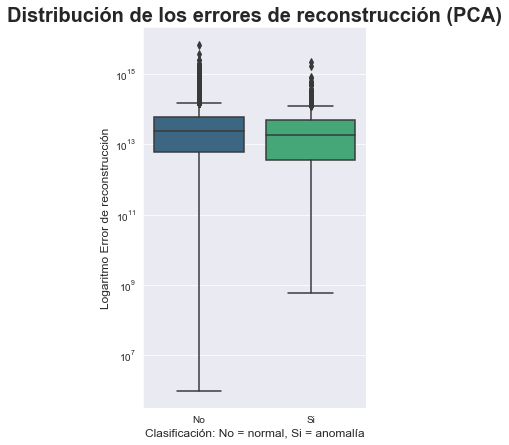

In [34]:
df_resultados = pd.DataFrame({'error_reconstruccion': error_reconstruccion, 'real': datos_y})

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 7))
sns.boxplot(x = 'real', y = 'error_reconstruccion', data = df_resultados, palette = 'viridis', ax = ax)

ax.set_yscale("log")
ax.set_title('Distribución de los errores de reconstrucción (PCA)', fontsize = 20, fontweight = "bold")
ax.set_ylabel('Logaritmo Error de reconstrucción', fontsize = 12)
ax.set_xlabel('Clasificación: No = normal, Si = anomalía', fontsize = 12);


In [35]:
df_resultados = df_resultados.sort_values('error_reconstruccion', ascending=True).reset_index(drop=True)

df_resultados['clasificacion'] = np.where(df_resultados.index <= 610, "Si", "No")

pd.crosstab(df_resultados.real,df_resultados.clasificacion)

clasificacion,No,Si
real,,
No,7299,566
Si,565,45


De las 610 instancias que realmente están categorizadas como anomalías, apenas el 7.38% (45/610) fueron clasificadas de manera correcta. Adicional a esto el porcentaje de falsos positivos (92.62%) es muy elevado. Por lo que se que concluye que el método de PCA no consigue resultados confiables para este caso en partícular.